# Session 3 — Sentence-Level Analysis
## Measure 1: Sentence Length & Distribution
This notebook helps you split your text into sentences and compute:
- number of sentences
- average sentence length (in tokens and in characters)
- distribution / histogram of sentence lengths
- comparison across two texts/authors

Like before, we'll analyze Stephen King books as our example texts:
-  Pet Semetary
- The Shining

In [6]:
import re
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

import spacy
from spacy.cli import download

# Load spaCy model or install if missing
MODEL_NAME = "en_core_web_sm"
if not spacy.util.is_package(MODEL_NAME):
    download(MODEL_NAME)

nlp = spacy.load(MODEL_NAME)
print("spaCy model ready:", MODEL_NAME)


def load_book(filepath: str) -> str:
    """Load text file as UTF-8 and return cleaned text."""
    text = Path(filepath).read_text(encoding="utf-8", errors="ignore")
    return text.strip()

# Load both horror books
pet_raw, shining_raw = load_book("../data/PetSemetary.txt"), load_book("../data/TheShining.txt")
print("Loaded texts.")


spaCy model ready: en_core_web_sm
Loaded texts.


In [7]:
WORD_RE = re.compile(r"[A-Za-z']+")  # simple word regex

def normalize(text: str) -> str:
    text = text.replace("’", "'").replace("‘", "'")
    text = text.replace("\r\n", "\n")
    text = re.sub(r"-\s*\n", "", text)  # join line-break hyphens
    text = re.sub(r"\s+", " ", text)    # normalize whitespace
    return text.strip()

def tokenize(text: str):
    return WORD_RE.findall(text.lower())

# Normalize
pet_norm, shining_norm = normalize(pet_raw), normalize(shining_raw)

# Tokenize raw words
pet_tokens_raw, shining_tokens_raw = tokenize(pet_norm), tokenize(shining_norm)

# Prune junk short tokens (keep 1–2 letter meaningful words only)
keep_1 = {"a", "i"}
keep_2 = {"of","to","in","on","by","an","or","as","is","it","we","us","he","me","my","so","be","do","no","at","up","if","go","am","oh"}

pet_tokens = [t for t in pet_tokens_raw if (len(t) > 2) or (len(t) == 1 and t in keep_1) or (len(t) == 2 and t in keep_2)]
sh_tokens  = [t for t in shining_tokens_raw if (len(t) > 2) or (len(t) == 1 and t in keep_1) or (len(t) == 2 and t in keep_2)]

print(f"After pruning → Pet words: {len(pet_tokens):,} | The Shining words: {len(sh_tokens):,}")


After pruning → Pet words: 146,600 | The Shining words: 161,448


In [8]:
def split_sentences(text: str):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

# Split sentences
pet_sentences, shining_sentences = split_sentences(pet_norm), split_sentences(shining_norm)

def analyze_sentences(sent_list, book_name):
    tokens_list = [len(s.split()) for s in sent_list if len(s.split()) > 2]
    chars_list  = [len(s) for s in sent_list if len(s.split()) > 2]

    print(f"\n=== {book_name} ===")
    print(f"Sentences: {len(tokens_list):,}")
    print(f"Avg length (tokens): {sum(tokens_list)/len(tokens_list):.2f}")
    print(f"Avg length (chars) : {sum(chars_list)/len(chars_list):.2f}")
    print(f"Min tokens: {min(tokens_list)} | Max tokens: {max(tokens_list)}")

    return tokens_list, chars_list

pet_len_tok, pet_len_chr = analyze_sentences(pet_sentences, "Pet Sematary")
sh_len_tok, sh_len_chr  = analyze_sentences(shining_sentences, "The Shining")



=== Pet Sematary ===
Sentences: 8,907
Avg length (tokens): 16.28
Avg length (chars) : 87.96
Min tokens: 3 | Max tokens: 172

=== The Shining ===
Sentences: 11,118
Avg length (tokens): 14.44
Avg length (chars) : 78.11
Min tokens: 3 | Max tokens: 142


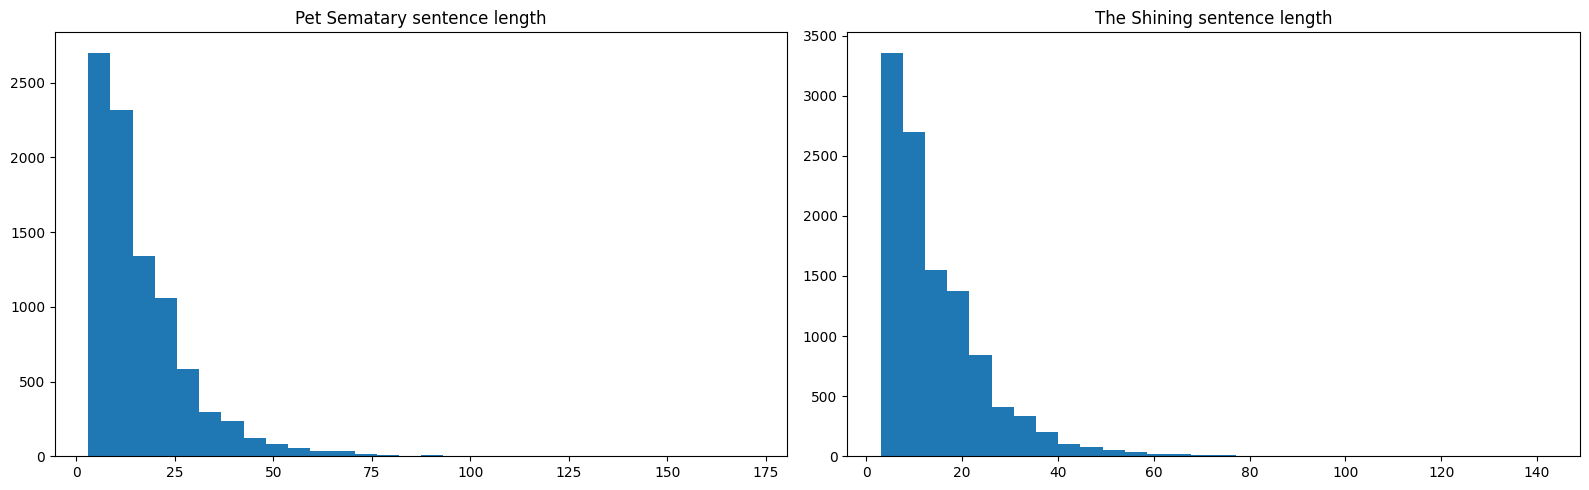

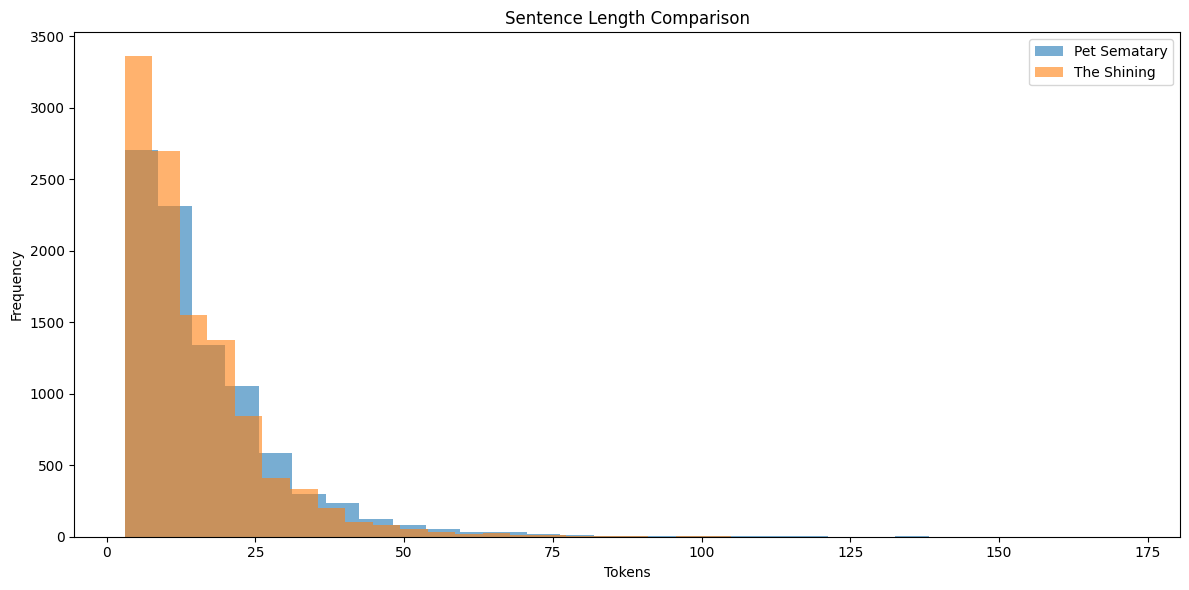

Short tokens remaining: [('he', 7164), ('a', 7036), ('to', 6874), ('of', 6290), ('it', 4870), ('in', 4687), ('on', 2561), ('i', 2216), ('at', 1989), ('up', 1589), ('as', 1458), ('be', 1192), ('if', 1068), ('or', 916), ('no', 882), ('so', 697), ('by', 680), ('is', 660), ('an', 658), ('me', 656)]


In [9]:
# Two-book sentence length histograms
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].hist(pet_len_tok, bins=30); axes[0].set_title("Pet Sematary sentence length")
axes[1].hist(sh_len_tok, bins=30); axes[1].set_title("The Shining sentence length")
plt.tight_layout(); plt.show()

# Overlay comparison
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(pet_len_tok, bins=30, alpha=0.6, label="Pet Sematary")
ax.hist(sh_len_tok, bins=30, alpha=0.6, label="The Shining")
ax.set_title("Sentence Length Comparison")
ax.set_xlabel("Tokens"); ax.set_ylabel("Frequency")
ax.legend()
plt.tight_layout(); plt.show()
# Sanity check: show short tokens left (should be few and meaningful)

full_short_counts = Counter(t for t in pet_tokens + sh_tokens if len(t) <= 2)
print("Short tokens remaining:", full_short_counts.most_common(20))
